# TADAWUL STOCK EXCHANGE ANALYSIS 

**Where to Find the Dataset?**

This dataset was shared publically to Kaggle by Salwa Al Zahrani here: https://www.kaggle.com/datasets/salwaalzahrani/saudi-stock-exchange-tadawul

**About Dataset**

This is the data of Saudi stock market companies since 2000-01-01. It was collected from Saudi Stock Exchange (Tadawul) https://www.tadawul.com.sa/wps/portal/tadawul/home/

**Content** 

Each row in the database represents the price of a specific stock at a specific date:
- symbol (Integer): The symbol or the reference number of the company
- name(String) Name of the company
- trading_name (String): The trading name of the company
- sectoer (String): The sector in which the company operates
- date (Date): The date of the stock price
- open (Decimal): The opening price
- high (Decimal): The highest price of the stock at that day
- low (Decimal): The lowest price of the stock at that day
- close (Decimal): The closing price
- change (Decimal): The change in price from the last day
- perc_Change (Decimal): The percentage of the change
- volume_traded (Decimal): The volume of the trades for the day
- value_traded (Decimal): The value of the trades for the day
- no_trades (Decimal): The number of trades for the day

**Problem Statement**

The Saudi Stock Exchange, also known as Tadawul, is one of the most prominent stock exchanges in the Middle East, representing a key component of the global financial landscape. Despite its significance, there is a need for a thorough and detailed analysis to understand its underlying patterns, assess its liquidity, and grasp the volatility of its components. Investors, analysts, and financial enthusiasts require a comprehensive resource to navigate its complexities, make informed decisions, and identify potential areas of interest and risk.

**Project Introduction**

This project embarks on an exhaustive journey to analyze the Tadawul Saudi Stock Market, aiming to unveil its characteristics, understand its behavior, and provide valuable insights for informed trading and investment decisions. The dataset spans several years, encompassing a wide array of companies across different sectors, providing a rich ground for analysis.

Key Objectives:
- Understand Market Trends: Analyze historical stock prices and calculate returns to grasp the market's general behavior.
- Time Series Decomposition: Break down stock prices into trend, seasonality, and residuals to gain deeper insights into the market's behavior.
- Binned Time Period Analysis: Categorize historical data into distinct time bins to observe the market's evolution and highlight potential patterns or trends.
- Respond to Crisis: Evaluate the market's response to crises, specifically focusing on events like Black February, to understand its resilience and capacity for recovery.
- Assess Liquidity: Identify the most liquid sectors and companies, aiding traders and investors in making informed decisions.
- Correlational Analysis: Investigate how different sectors and companies within the financial industry are correlated to each other.
- Model Volatility: Apply advanced models like GARCH and Monte Carlo simulation to forecast future volatility and understand potential risks and rewards.


By the end of this project, we aim to provide a robust and detailed analysis of the Tadawul stock market, offering a valuable resource for anyone looking to understand and navigate its complexities. The insights derived will serve as a guide for making strategic investment decisions, identifying opportunities, and mitigating risks in the Saudi stock market.


# Importing the Dataset & Libraries 

In [4]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.0/921.0 kB 48.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cm 

  Preparing metadata (setup.py) ... - done
  Created wheel for cm: filename=cm-0.1a2-py3-none-any.whl size=7236 sha256=53d5c000c5afc378846896278182dcda12538b98c3ded65c3d6a20808b8e800c
  Stored in directory: /home/datalore/.cache/pip/wheels/e9/5d/51/145bf9376ab7777c5ec2a89c1fb5a0de0e07e1defd22b44b1e
Successfully built cm

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.stats as stats
import numpy as np
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
from arch import arch_model

In [11]:
# Define the file path
file_path = '/data/notebook_files/Tadawul_stcks.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()

# Display the first few rows of the dataset
df_head = df.head()

# Show dataset information and the first few rows
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 63.4+ MB


(None,
    symbol                         name trading_name  sectoer        date  \
 0    2030  Saudi Arabia Refineries Co.         SARCO  Energy  2020-03-05   
 1    2030  Saudi Arabia Refineries Co.         SARCO  Energy  2020-03-04   
 2    2030  Saudi Arabia Refineries Co.         SARCO  Energy  2020-03-03   
 3    2030  Saudi Arabia Refineries Co.         SARCO  Energy  2020-03-02   
 4    2030  Saudi Arabia Refineries Co.         SARCO  Energy  2020-03-01   
 
     open   high    low  close  change  perc_Change  volume_traded   \
 0  35.55  35.85  34.90  34.90   -0.40        -1.13        436609.0   
 1  34.70  35.65  34.50  35.30    0.25         0.71        737624.0   
 2  34.70  35.15  34.70  35.05    1.05         3.09        489831.0   
 3  35.20  35.65  34.00  34.00   -0.55        -1.59        736157.0   
 4  35.35  35.60  34.25  34.55   -2.05        -5.60        738685.0   
 
    value_traded  no_trades   
 0   15399073.50       804.0  
 1   25981391.35      1268.0  
 2   171

# Data Wrangling 

In this section, we focus on preparing our dataset for analysis. This involves handling missing values, identifying and removing duplicate entries, and ensuring that our data is clean and reliable. Data wrangling is a crucial step in the data analysis process as it directly impacts the accuracy and reliability of our findings. Let's start by identifying missing values and duplicates, and then proceed to clean our dataset for the subsequent analysis.

In [12]:
# Step 1: Identify and Handle Missing Values
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values / len(df)) * 100

# Step 2: Check for Duplicates
# Find duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Show the results of missing values and duplicates analysis
missing_values, missing_values_percentage, duplicate_rows

(symbol               0
 name                 0
 trading_name         0
 sectoer              0
 date                 0
 open              6455
 high              6697
 low               6697
 close                0
 change               0
 perc_Change          0
 volume_traded        0
 value_traded         0
 no_trades         7691
 dtype: int64,
 symbol            0.000000
 name              0.000000
 trading_name      0.000000
 sectoer           0.000000
 date              0.000000
 open              1.087032
 high              1.127785
 low               1.127785
 close             0.000000
 change            0.000000
 perc_Change       0.000000
 volume_traded     0.000000
 value_traded      0.000000
 no_trades         1.295176
 dtype: float64,
 Empty DataFrame
 Columns: [symbol, name, trading_name , sectoer, date, open, high, low, close, change, perc_Change, volume_traded , value_traded, no_trades ]
 Index: [])

In [13]:
# Step 1: Delete rows with missing values (less than 2% of the dataset)
df_cleaned = df.dropna()

# Step 2: Convert the 'date' column to datetime data type
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Step 3: Rename the 'sectoer' column to 'sector'
df_cleaned = df_cleaned.rename(columns={'sectoer': 'sector'})

# Display basic information about the cleaned dataset
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()

# Show the cleaned dataset information and the first few rows
df_cleaned_info, df_cleaned_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579431 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   symbol          579431 non-null  int64         
 1   name            579431 non-null  object        
 2   trading_name    579431 non-null  object        
 3   sector          579431 non-null  object        
 4   date            579431 non-null  datetime64[ns]
 5   open            579431 non-null  float64       
 6   high            579431 non-null  float64       
 7   low             579431 non-null  float64       
 8   close           579431 non-null  float64       
 9   change          579431 non-null  float64       
 10  perc_Change     579431 non-null  float64       
 11  volume_traded   579431 non-null  float64       
 12  value_traded    579431 non-null  float64       
 13  no_trades       579431 non-null  float64       
dtypes: datetime64[ns](1), float64(9), in

<ipython-input-13-6b309dfcca05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')


(None,
    symbol                         name trading_name   sector       date  \
 0    2030  Saudi Arabia Refineries Co.         SARCO  Energy 2020-03-05   
 1    2030  Saudi Arabia Refineries Co.         SARCO  Energy 2020-03-04   
 2    2030  Saudi Arabia Refineries Co.         SARCO  Energy 2020-03-03   
 3    2030  Saudi Arabia Refineries Co.         SARCO  Energy 2020-03-02   
 4    2030  Saudi Arabia Refineries Co.         SARCO  Energy 2020-03-01   
 
     open   high    low  close  change  perc_Change  volume_traded   \
 0  35.55  35.85  34.90  34.90   -0.40        -1.13        436609.0   
 1  34.70  35.65  34.50  35.30    0.25         0.71        737624.0   
 2  34.70  35.15  34.70  35.05    1.05         3.09        489831.0   
 3  35.20  35.65  34.00  34.00   -0.55        -1.59        736157.0   
 4  35.35  35.60  34.25  34.55   -2.05        -5.60        738685.0   
 
    value_traded  no_trades   
 0   15399073.50       804.0  
 1   25981391.35      1268.0  
 2   17116413.

In [14]:
# Stripping leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Verify that the extra spaces have been removed
df_cleaned.columns

Index(['symbol', 'name', 'trading_name', 'sector', 'date', 'open', 'high',
       'low', 'close', 'change', 'perc_Change', 'volume_traded',
       'value_traded', 'no_trades'],
      dtype='object')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) serves as a crucial initial step in our comprehensive investigation of the Saudi stock market. By employing a variety of visual and quantitative techniques, we strive to uncover underlying patterns, identify anomalies, and gain a deeper understanding of the dataset’s structure and characteristics. In this section, some of the aspects we delve into are the intricacies of the market’s pricing behavior, the distribution of companies across different sectors, time-series decomposition and time-binned analysis. Our aim is to lay a robust foundation for subsequent in-depth analyses, ensuring that our insights and conclusions are grounded in a thorough and nuanced comprehension of the market’s dynamics. This meticulous exploration not only aids in validating the quality of our data but also provides valuable context for interpreting patterns and trends observed in later stages of our analysis.

In [13]:
# 1. General Overview

# 1.1. Number of Unique Companies
unique_companies = df_cleaned['symbol'].nunique()

# 1.2. Date Range: Identifying How Many Years the Dataset Covers
min_date = df_cleaned['date'].min()
max_date = df_cleaned['date'].max()
date_range = max_date - min_date
years_covered = date_range.days // 365

# Display key statistics for the dataset
unique_companies, min_date, max_date, years_covered

(197, Timestamp('2001-12-31 00:00:00'), Timestamp('2020-04-16 00:00:00'), 18)

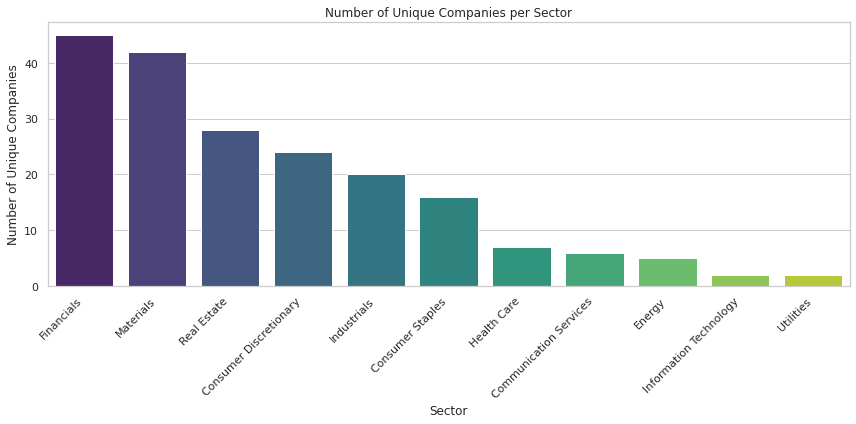

(sector
 Financials                45
 Materials                 42
 Real Estate               28
 Consumer Discretionary    24
 Industrials               20
 Consumer Staples          16
 Health Care                7
 Communication Services     6
 Energy                     5
 Information Technology     2
 Utilities                  2
 Name: symbol, dtype: int64,
 None)

In [14]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# 1.2. Number of Unique Companies per Sector
unique_companies_per_sector = df_cleaned.groupby('sector')['symbol'].nunique().sort_values(ascending=False)

# Visualization: Number of Unique Companies per Sector
plt.figure(figsize=(12, 6))
unique_companies_barplot = sns.barplot(x=unique_companies_per_sector.index, y=unique_companies_per_sector.values, palette='viridis')
unique_companies_barplot.set_xticklabels(unique_companies_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Number of Unique Companies per Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Unique Companies')
plt.tight_layout()

# Display the number of unique companies per sector and the plot
unique_companies_per_sector, plt.show()

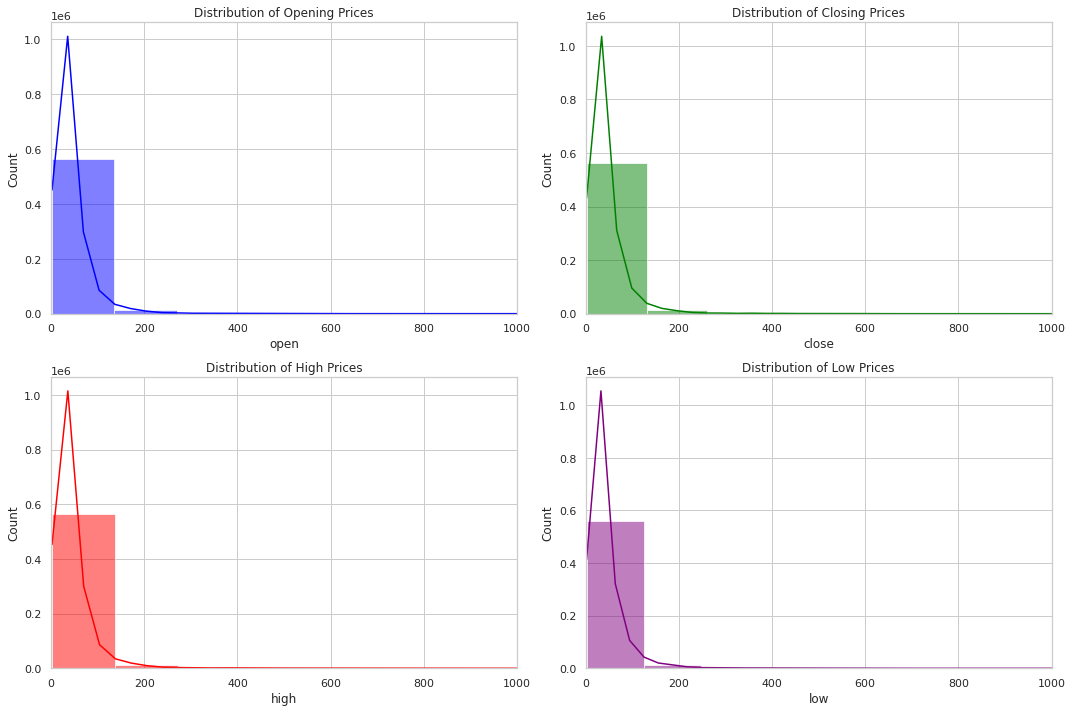

In [109]:
# Replotting the distributions with x-axis limits set to 0-1000
plt.figure(figsize=(15, 10))

# Subplot for 'Open' price distribution
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['open'], bins=50, kde=True, color='blue')
plt.title('Distribution of Opening Prices')
plt.xlim(0, 1000)

# Subplot for 'Close' price distribution
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned['close'], bins=50, kde=True, color='green')
plt.title('Distribution of Closing Prices')
plt.xlim(0, 1000)

# Subplot for 'High' price distribution
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['high'], bins=50, kde=True, color='red')
plt.title('Distribution of High Prices')
plt.xlim(0, 1000)

# Subplot for 'Low' price distribution
plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['low'], bins=50, kde=True, color='purple')
plt.title('Distribution of Low Prices')
plt.xlim(0, 1000)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [125]:
# Step 1: Filter the dataset for stock 1020
stock_1020_data = df_cleaned[df_cleaned['symbol'] == 1020]

# Step 2: Ensure the data is sorted in chronological order
stock_1020_data_sorted = stock_1020_data.sort_values(by='date')

# Display the first few rows of stock 1020 data
stock_1020_data_sorted.head()

,symbol,name,trading_name,sector,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,daily_return,rolling_volatility
380023,1020,Bank Aljazira,BJAZ,Financials,2001-12-31,2.38,2.38,2.38,2.38,-101.37,-97.71,39118.0,92981.25,3.0,-0.051793,0.013978
380022,1020,Bank Aljazira,BJAZ,Financials,2002-01-01,2.38,2.52,2.38,2.51,0.13,5.46,255945.0,614015.00,10.0,0.000000,0.009973
380021,1020,Bank Aljazira,BJAZ,Financials,2002-01-02,2.52,2.52,2.52,2.51,0.00,0.00,2228573.0,5478124.75,70.0,0.000000,0.009973
380020,1020,Bank Aljazira,BJAZ,Financials,2002-01-03,2.52,2.52,2.52,2.51,0.00,0.00,738926.0,1825350.00,13.0,0.000000,0.009973
380019,1020,Bank Aljazira,BJAZ,Financials,2002-01-05,2.52,2.52,2.52,2.51,0.00,0.00,718949.0,1761923.50,16.0,0.000000,0.013978


In [126]:
# Calculating moving averages
stock_1020_data_sorted['SMA_20'] = stock_1020_data_sorted['close'].rolling(window=20).mean()
stock_1020_data_sorted['SMA_50'] = stock_1020_data_sorted['close'].rolling(window=50).mean()
stock_1020_data_sorted['SMA_200'] = stock_1020_data_sorted['close'].rolling(window=200).mean()

# Visualizing the moving averages along with the original closing price data
plt.figure(figsize=(15, 7))
plt.plot(stock_1020_data_sorted['date'], stock_1020_data_sorted['close'], label='Closing Price', alpha=0.5)
plt.plot(stock_1020_data_sorted['date'], stock_1020_data_sorted['SMA_20'], label='20-Day Moving Average', alpha=0.8)
plt.plot(stock_1020_data_sorted['date'], stock_1020_data_sorted['SMA_50'], label='50-Day Moving Average', alpha=0.8)
plt.plot(stock_1020_data_sorted['date'], stock_1020_data_sorted['SMA_200'], label='200-Day Moving Average', alpha=0.8)

# Adding title and labels
plt.title('Moving Averages of Stock 1020')
plt.xlabel('Date')
plt.ylabel('Price (SAR)')
plt.legend()
plt.grid(True)
plt.show()

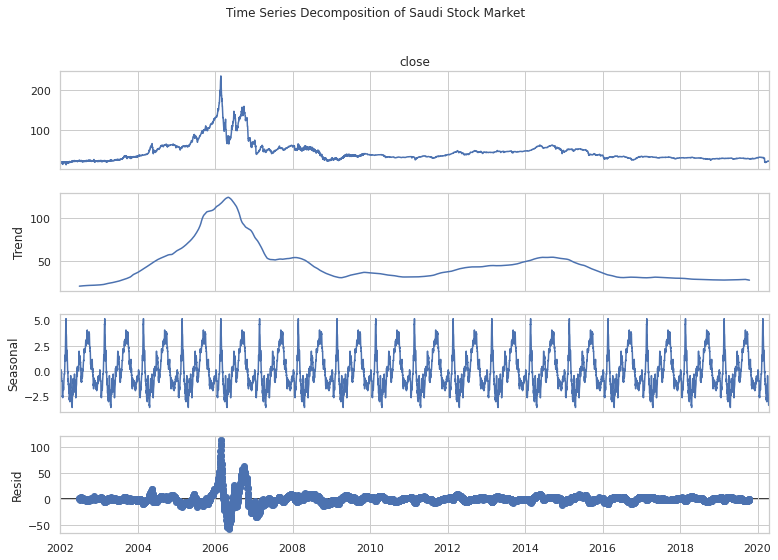

In [130]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the daily average closing price of all stocks in the dataset
market_daily_avg = df_cleaned.groupby('date')['close'].mean()

# Ensure that the time series is complete by filling any missing dates with the previous available value
market_daily_avg = market_daily_avg.asfreq('D').fillna(method='ffill')

# Perform time series decomposition
result = seasonal_decompose(market_daily_avg, model='additive', period=365)

# Plotting the decomposition components
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Saudi Stock Market', y=1.02)
plt.show()

<Figure size 1440x1080 with 0 Axes>

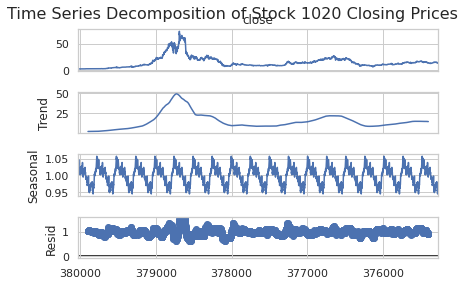

In [157]:
# Applying seasonal decomposition with the corrected parameter
result = seasonal_decompose(stock_1020_data_sorted['close'], model='multiplicative', period=252)

# Plotting the decomposition results
fig = plt.figure(figsize=(20, 15))
result.plot()
plt.suptitle('Time Series Decomposition of Stock 1020 Closing Prices', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjusting the title position
plt.show()

In [137]:
# Recalculating the descriptive statistics for each time bin
time_bins = {
    'Early Period (2001-2008)': '2001-01-01 2008-12-31',
    'Mid Period (2009-2015)': '2009-01-01 2015-12-31',
    'Modern Period (2016-2020)': '2016-01-01 2021-12-31'
}

# Creating a dictionary to store the descriptive statistics
descriptive_stats = {}

# Calculating descriptive statistics for each time period
for period, date_range in time_bins.items():
    start_date, end_date = date_range.split()
    mask = (df_cleaned['date'] >= start_date) & (df_cleaned['date'] <= end_date)
    descriptive_stats[period] = df_cleaned[mask].describe(include='all')

# Printing the descriptive statistics for each time bin
for time_bin, stats in descriptive_stats.items():
    print(f"Descriptive Statistics: {time_bin}")
    print(stats, "\n")


Descriptive Statistics: Early Period (2001-2008)
               symbol                   name trading_name     sector  \
count   143948.000000                 143948       143948     143948   
unique            NaN                    119          119         10   
top               NaN  Samba Financial Group        SAMBA  Materials   
freq              NaN                   1967         1967      39490   
first             NaN                    NaN          NaN        NaN   
last              NaN                    NaN          NaN        NaN   
mean      3411.882833                    NaN          NaN        NaN   
std       1801.775149                    NaN          NaN        NaN   
min       1010.000000                    NaN          NaN        NaN   
25%       2120.000000                    NaN          NaN        NaN   
50%       3030.000000                    NaN          NaN        NaN   
75%       4150.000000                    NaN          NaN        NaN   
max       8210.

<ipython-input-137-1570d0963bd2>:15: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-137-1570d0963bd2>:15: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-137-1570d0963bd2>:15: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



In [138]:
# Creating time bins for the analysis
bins = [pd.to_datetime("2000-01-01"), pd.to_datetime("2008-12-31"), 
        pd.to_datetime("2015-12-31"), pd.to_datetime("2020-12-31")]
labels = ['2001-2008', '2009-2015', '2016-2020']

# Assigning bins to each row in the dataframe
df_cleaned['time_period'] = pd.cut(df_cleaned['date'], bins=bins, labels=labels, right=False)

# Checking the first few rows to verify bin assignment
df_cleaned[['date', 'time_period']].head()

,date,time_period
0,2020-03-05,2016-2020
1,2020-03-04,2016-2020
2,2020-03-03,2016-2020
3,2020-03-02,2016-2020
4,2020-03-01,2016-2020


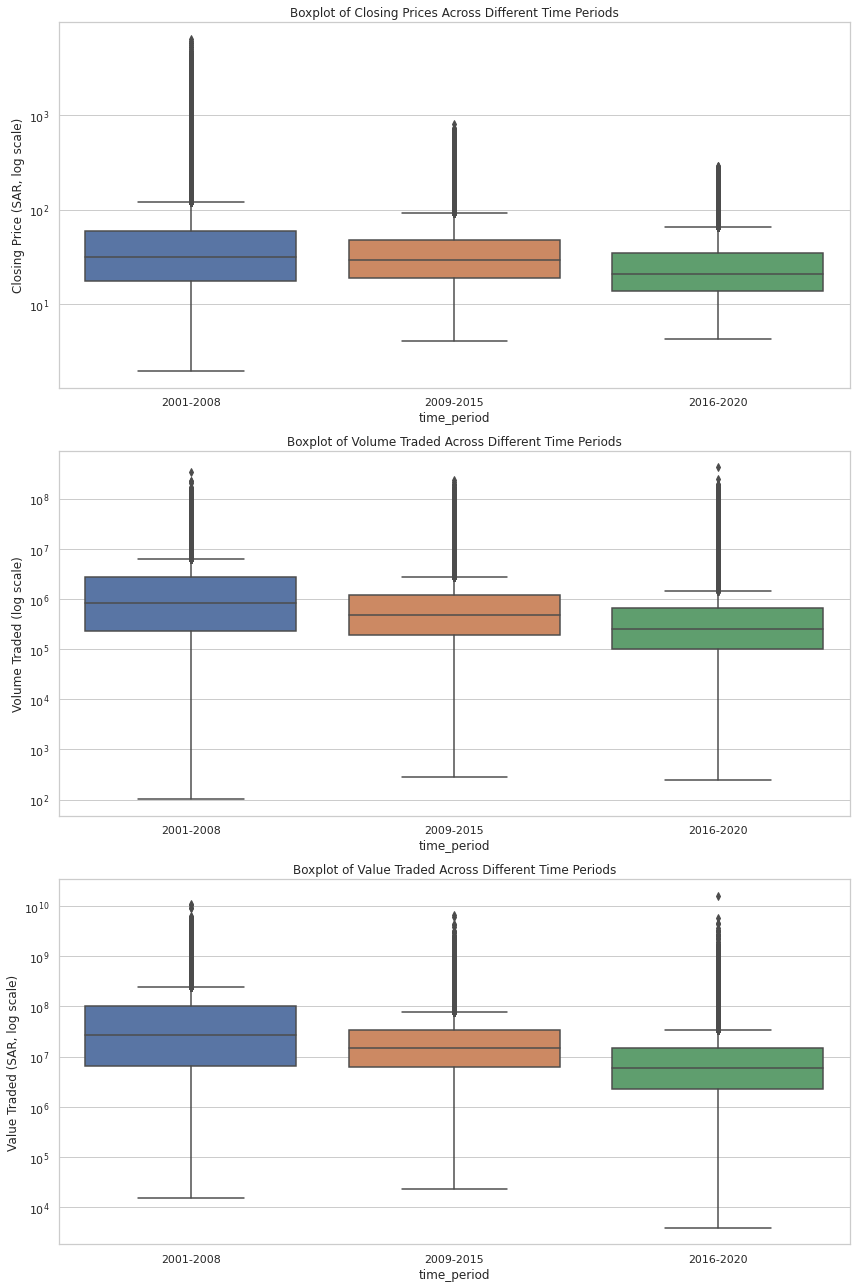

In [139]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Boxplot for Closing Prices
sns.boxplot(x="time_period", y="close", data=df_cleaned, ax=axes[0])
axes[0].set_title('Boxplot of Closing Prices Across Different Time Periods')
axes[0].set_yscale('log')
axes[0].set_ylabel('Closing Price (SAR, log scale)')

# Boxplot for Volume Traded
sns.boxplot(x="time_period", y="volume_traded", data=df_cleaned, ax=axes[1])
axes[1].set_title('Boxplot of Volume Traded Across Different Time Periods')
axes[1].set_yscale('log')
axes[1].set_ylabel('Volume Traded (log scale)')

# Boxplot for Value Traded
sns.boxplot(x="time_period", y="value_traded", data=df_cleaned, ax=axes[2])
axes[2].set_title('Boxplot of Value Traded Across Different Time Periods')
axes[2].set_yscale('log')
axes[2].set_ylabel('Value Traded (SAR, log scale)')

# Adjust layout
plt.tight_layout()
plt.show()

# Crisis Analysis

The stock market's response to crises and external shocks is a critical aspect of its behavior, influencing investment decisions and risk management strategies. In this section, we analyze how the Saudi stock market reacts to specific events, with a focus on the Black February event of 2006. By understanding the market's resilience and recovery patterns, investors can better prepare for future uncertainties and make more informed investment choices.

Read more about the crash here: https://cma.org.sa/en/Market/Documents/CMA_Crash2006_en.pdf

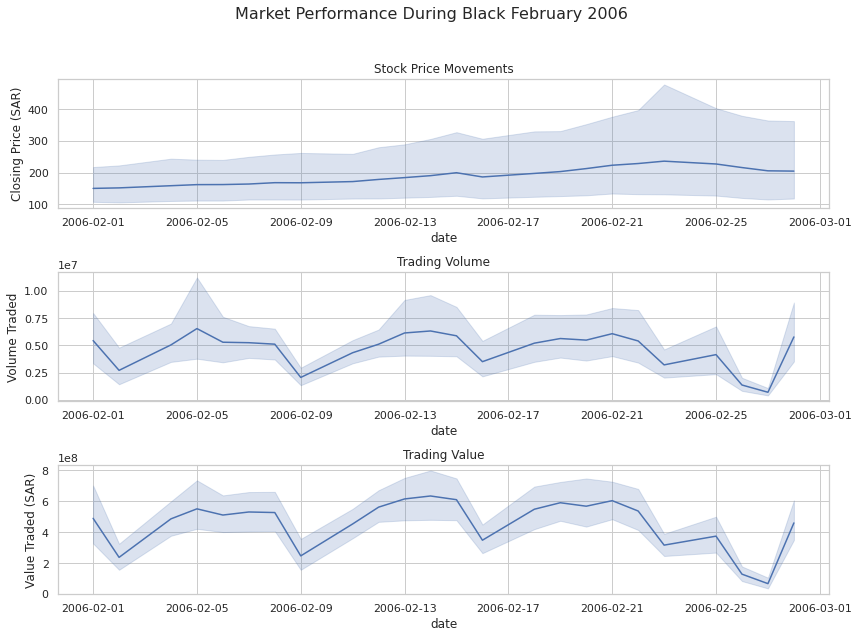

In [141]:
# Define the crisis periods
pre_crisis_period = df_cleaned[(df_cleaned['date'] >= '2005-12-01') & (df_cleaned['date'] <= '2006-01-31')]
crisis_period = df_cleaned[(df_cleaned['date'] >= '2006-02-01') & (df_cleaned['date'] <= '2006-02-28')]
post_crisis_period = df_cleaned[(df_cleaned['date'] >= '2006-03-01') & (df_cleaned['date'] <= '2006-04-30')]

# Function to plot performance metrics
def plot_performance_metrics(data, title):
    fig, ax = plt.subplots(3, 1, figsize=(12, 9))
    
    # Stock Price Movements
    sns.lineplot(data=data, x='date', y='close', ax=ax[0])
    ax[0].set_title('Stock Price Movements')
    ax[0].set_ylabel('Closing Price (SAR)')
    
    # Trading Volume
    sns.lineplot(data=data, x='date', y='volume_traded', ax=ax[1])
    ax[1].set_title('Trading Volume')
    ax[1].set_ylabel('Volume Traded')
    
    # Trading Value
    sns.lineplot(data=data, x='date', y='value_traded', ax=ax[2])
    ax[2].set_title('Trading Value')
    ax[2].set_ylabel('Value Traded (SAR)')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot performance metrics for the entire market during the crisis period
plot_performance_metrics(crisis_period, 'Market Performance During Black February 2006')

In [142]:
# Define the date ranges for each period
pre_crisis_range = ('2005-01-01', '2005-12-31')
crisis_range = ('2006-02-01', '2006-02-28')
post_crisis_range = ('2006-03-01', '2006-12-31')

# Filter the dataset for each period
pre_crisis_data = df_cleaned[(df_cleaned['date'] >= pre_crisis_range[0]) & (df_cleaned['date'] <= pre_crisis_range[1])]
crisis_data = df_cleaned[(df_cleaned['date'] >= crisis_range[0]) & (df_cleaned['date'] <= crisis_range[1])]
post_crisis_data = df_cleaned[(df_cleaned['date'] >= post_crisis_range[0]) & (df_cleaned['date'] <= post_crisis_range[1])]

# Calculate average stock prices, trading volumes, and trading values for each period
average_stock_price_pre_crisis = pre_crisis_data['close'].mean()
average_stock_price_crisis = crisis_data['close'].mean()
average_stock_price_post_crisis = post_crisis_data['close'].mean()

average_volume_pre_crisis = pre_crisis_data['volume_traded'].mean()
average_volume_crisis = crisis_data['volume_traded'].mean()
average_volume_post_crisis = post_crisis_data['volume_traded'].mean()

average_value_pre_crisis = pre_crisis_data['value_traded'].mean()
average_value_crisis = crisis_data['value_traded'].mean()
average_value_post_crisis = post_crisis_data['value_traded'].mean()

# Creating a DataFrame to display the results
period_comparison_df = pd.DataFrame({
    'Period': ['Pre-Crisis', 'Crisis', 'Post-Crisis'],
    'Average Stock Price': [average_stock_price_pre_crisis, average_stock_price_crisis, average_stock_price_post_crisis],
    'Average Trading Volume': [average_volume_pre_crisis, average_volume_crisis, average_volume_post_crisis],
    'Average Trading Value': [average_value_pre_crisis, average_value_crisis, average_value_post_crisis]
})

# Display the results
period_comparison_df

,Period,Average Stock Price,Average Trading Volume,Average Trading Value
0,Pre-Crisis,82.094492,3.548776e+06,1.890775e+08
1,Crisis,189.769724,4.637878e+06,4.571013e+08
2,Post-Crisis,107.929808,3.793838e+06,2.104911e+08


In [143]:
# Extracting the 'close' prices for each period
close_prices_pre_crisis = pre_crisis_data['close'].dropna()
close_prices_crisis = crisis_data['close'].dropna()
close_prices_post_crisis = post_crisis_data['close'].dropna()

# Performing ANOVA test for 'close' prices
anova_result_close = f_oneway(close_prices_pre_crisis, close_prices_crisis, close_prices_post_crisis)

# Extracting the 'volume_traded' for each period
volume_traded_pre_crisis = pre_crisis_data['volume_traded'].dropna()
volume_traded_crisis = crisis_data['volume_traded'].dropna()
volume_traded_post_crisis = post_crisis_data['volume_traded'].dropna()

# Performing ANOVA test for 'volume_traded'
anova_result_volume = f_oneway(volume_traded_pre_crisis, volume_traded_crisis, volume_traded_post_crisis)

# Extracting the 'value_traded' for each period
value_traded_pre_crisis = pre_crisis_data['value_traded'].dropna()
value_traded_crisis = crisis_data['value_traded'].dropna()
value_traded_post_crisis = post_crisis_data['value_traded'].dropna()

# Performing ANOVA test for 'value_traded'
anova_result_value = f_oneway(value_traded_pre_crisis, value_traded_crisis, value_traded_post_crisis)

# Creating a DataFrame to display the results
anova_results_df = pd.DataFrame({
    'Metric': ['Average Stock Price', 'Average Trading Volume', 'Average Trading Value'],
    'F-Statistic': [anova_result_close.statistic, anova_result_volume.statistic, anova_result_value.statistic],
    'P-Value': [anova_result_close.pvalue, anova_result_volume.pvalue, anova_result_value.pvalue]
})

# Display the results
anova_results_df

,Metric,F-Statistic,P-Value
0,Average Stock Price,159.614399,9.095922e-70
1,Average Trading Volume,25.957633,5.421783e-12
2,Average Trading Value,555.387720,1.336571e-238


# Trend Analysis

In this section, we delve into identifying and understanding the overarching trends and patterns within the Saudi stock market. By analyzing historical data, we aim to uncover the market's general direction, highlight significant growth periods, and pinpoint any potential downturns. This analysis is crucial for investors looking to make long-term investment decisions, as it provides insight into the market's stability and potential for future growth.

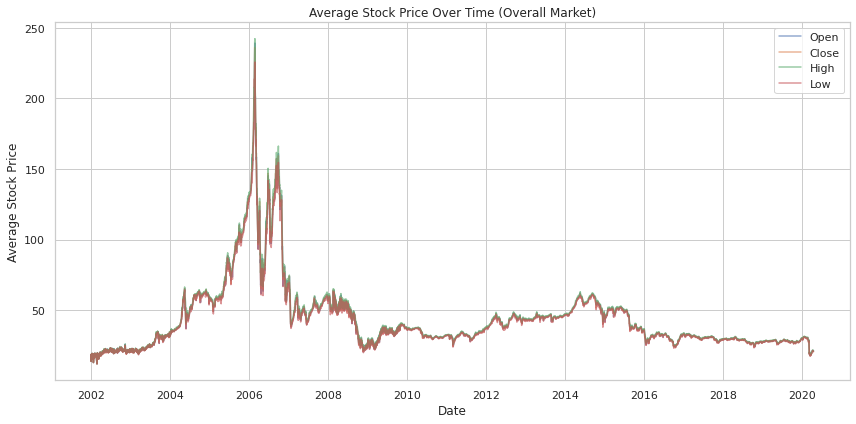

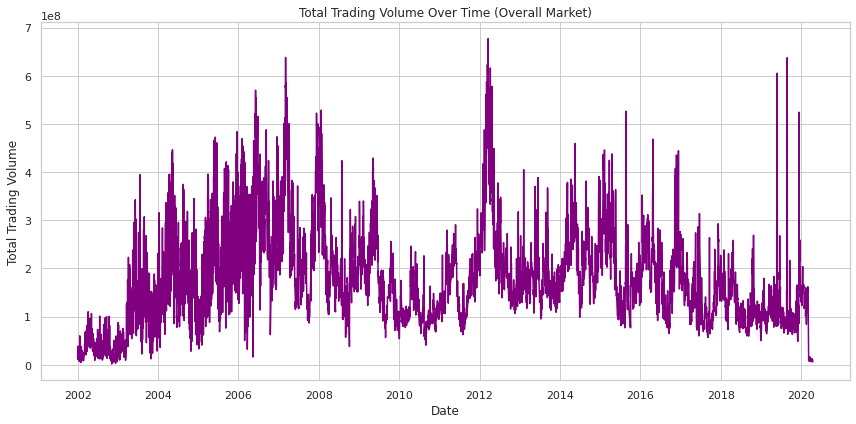

(              open        close         high          low
 count  4789.000000  4789.000000  4789.000000  4789.000000
 mean     44.086510    44.112418    44.934465    43.325843
 std      25.691240    25.779970    26.559052    24.941151
 min      11.865161    11.860968    11.951935    11.831613
 25%      29.205301    29.171008    29.573652    28.838272
 50%      36.269193    36.289355    36.784348    35.805937
 75%      50.800706    50.759619    51.625484    49.937761
 max     239.158493   236.010000   242.257808   225.707123,
 count    4.789000e+03
 mean     1.815742e+08
 std      1.021953e+08
 min      1.616432e+06
 25%      1.074516e+08
 50%      1.657301e+08
 75%      2.353816e+08
 max      6.771353e+08
 Name: volume_traded, dtype: float64)

In [17]:
# 1. Overall Market Trends

# 1.1. Average Stock Price Over Time
average_price_over_time = df_cleaned.groupby('date').agg({'open': 'mean', 'close': 'mean', 'high': 'mean', 'low': 'mean'})

# 1.2. Total Trading Volume Over Time
total_volume_over_time = df_cleaned.groupby('date')['volume_traded'].sum()

# Visualization: Average Stock Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(average_price_over_time.index, average_price_over_time['open'], label='Open', alpha=0.6)
plt.plot(average_price_over_time.index, average_price_over_time['close'], label='Close', alpha=0.6)
plt.plot(average_price_over_time.index, average_price_over_time['high'], label='High', alpha=0.6)
plt.plot(average_price_over_time.index, average_price_over_time['low'], label='Low', alpha=0.6)
plt.title('Average Stock Price Over Time (Overall Market)')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.legend()
plt.tight_layout()

# Visualization: Total Trading Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(total_volume_over_time.index, total_volume_over_time, color='purple')
plt.title('Total Trading Volume Over Time (Overall Market)')
plt.xlabel('Date')
plt.ylabel('Total Trading Volume')
plt.tight_layout()

# Show visualizations and summary statistics
plt.show(), average_price_over_time.describe(), total_volume_over_time.describe()

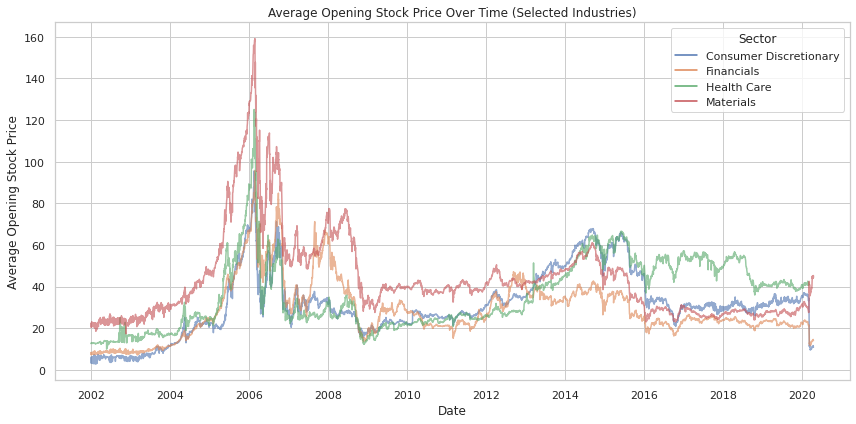

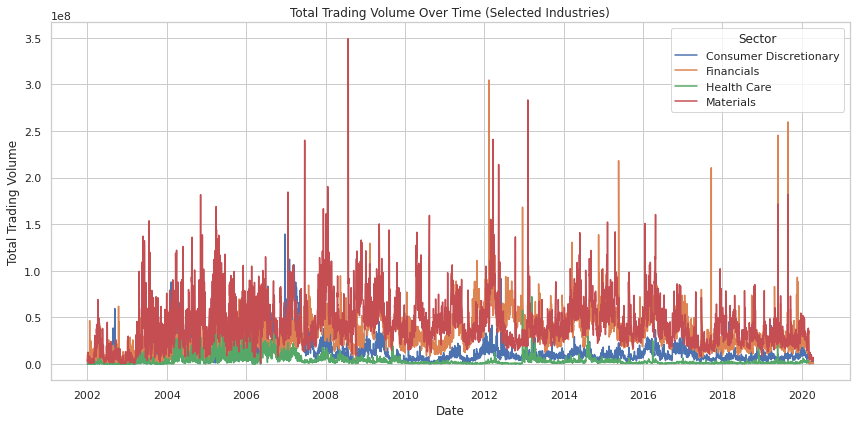

In [18]:
# 2. Industry-Specific Trends

# Selecting a few industries for comparison, including the Financial industry
selected_industries = ['Financials', 'Materials', 'Consumer Discretionary', 'Health Care']

# 2.1. Average Stock Price Over Time for Selected Industries
average_price_by_industry = df_cleaned[df_cleaned['sector'].isin(selected_industries)]
average_price_by_industry = average_price_by_industry.groupby(['date', 'sector']).agg({'open': 'mean', 'close': 'mean', 'high': 'mean', 'low': 'mean'}).reset_index()

# 2.2. Total Trading Volume Over Time for Selected Industries
total_volume_by_industry = df_cleaned[df_cleaned['sector'].isin(selected_industries)]
total_volume_by_industry = total_volume_by_industry.groupby(['date', 'sector'])['volume_traded'].sum().reset_index()

# Visualization: Average Stock Price Over Time for Selected Industries
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_by_industry, x='date', y='open', hue='sector', alpha=0.6)
plt.title('Average Opening Stock Price Over Time (Selected Industries)')
plt.xlabel('Date')
plt.ylabel('Average Opening Stock Price')
plt.legend(title='Sector')
plt.tight_layout()

# Visualization: Total Trading Volume Over Time for Selected Industries
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_volume_by_industry, x='date', y='volume_traded', hue='sector')
plt.title('Total Trading Volume Over Time (Selected Industries)')
plt.xlabel('Date')
plt.ylabel('Total Trading Volume')
plt.legend(title='Sector')
plt.tight_layout()

# Show visualizations
plt.show()

In [19]:
# Creating an interactive line plot for Total Trading Volume Over Time for Selected Industries
fig = px.line(total_volume_by_industry, x='date', y='volume_traded', color='sector', title='Total Trading Volume Over Time (Selected Industries)')
fig.update_layout(xaxis_title='Date', yaxis_title='Total Trading Volume', legend_title='Sector')

# Showing the interactive plot
fig.show()

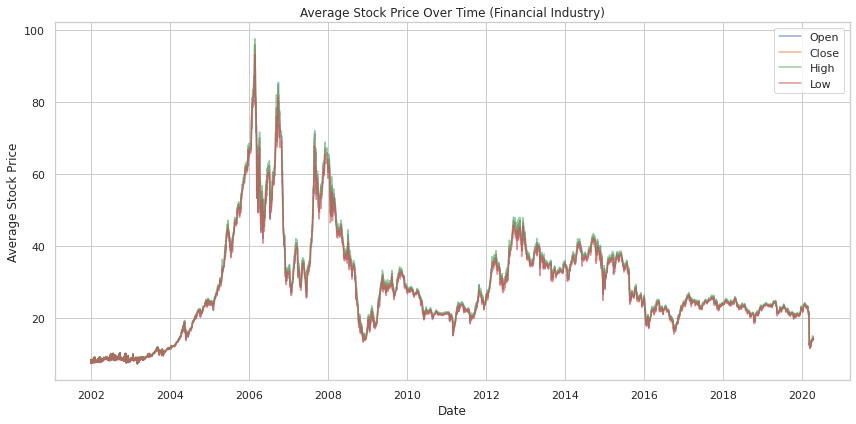

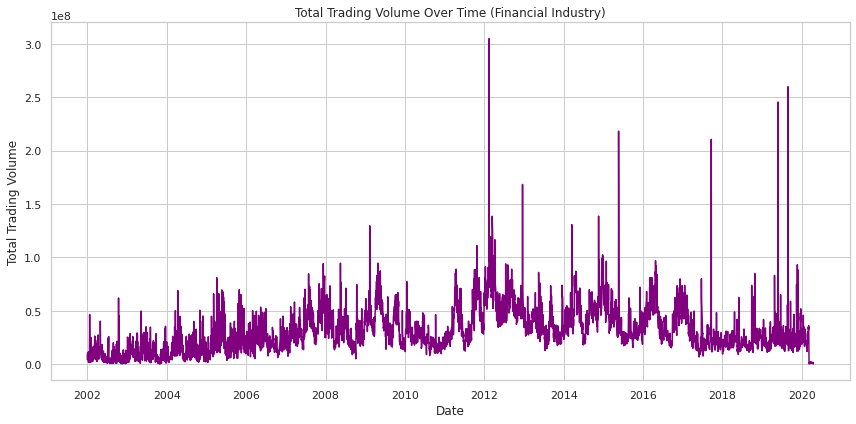

(              open        close         high          low
 count  4789.000000  4789.000000  4789.000000  4789.000000
 mean     28.506130    28.519676    29.091326    27.980829
 std      14.327873    14.356502    14.752870    13.933714
 min       7.178750     7.222500     7.222500     7.178750
 25%      20.899091    20.910000    21.220000    20.637073
 50%      24.675227    24.667500    25.040227    24.370889
 75%      35.597500    35.627500    36.376364    34.989070
 max      95.833333    95.830833    97.530000    93.141667,
 count    4.789000e+03
 mean     3.073624e+07
 std      2.082993e+07
 min      1.838120e+05
 25%      1.673467e+07
 50%      2.645672e+07
 75%      4.113658e+07
 max      3.047897e+08
 Name: volume_traded, dtype: float64)

In [21]:
# 3. Trends within the Financial Industry

# Filtering the dataset to include only companies from the Financial industry
financial_sector_data = df_cleaned[df_cleaned['sector'] == 'Financials']

# 3.1. Average Stock Price Over Time for Companies in the Financial Industry
average_price_financial = financial_sector_data.groupby(['date', 'symbol']).agg({'open': 'mean', 'close': 'mean', 'high': 'mean', 'low': 'mean'}).reset_index()
average_price_financial_sector = average_price_financial.groupby('date').agg({'open': 'mean', 'close': 'mean', 'high': 'mean', 'low': 'mean'})

# 3.2. Total Trading Volume Over Time for Companies in the Financial Industry
total_volume_financial_sector = financial_sector_data.groupby('date')['volume_traded'].sum()

# Visualization: Average Stock Price Over Time for the Financial Industry
plt.figure(figsize=(12, 6))
plt.plot(average_price_financial_sector.index, average_price_financial_sector['open'], label='Open', alpha=0.6)
plt.plot(average_price_financial_sector.index, average_price_financial_sector['close'], label='Close', alpha=0.6)
plt.plot(average_price_financial_sector.index, average_price_financial_sector['high'], label='High', alpha=0.6)
plt.plot(average_price_financial_sector.index, average_price_financial_sector['low'], label='Low', alpha=0.6)
plt.title('Average Stock Price Over Time (Financial Industry)')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.legend()
plt.tight_layout()

# Visualization: Total Trading Volume Over Time for the Financial Industry
plt.figure(figsize=(12, 6))
plt.plot(total_volume_financial_sector.index, total_volume_financial_sector, color='purple')
plt.title('Total Trading Volume Over Time (Financial Industry)')
plt.xlabel('Date')
plt.ylabel('Total Trading Volume')
plt.tight_layout()

# Show visualizations and summary statistics
plt.show(), average_price_financial_sector.describe(), total_volume_financial_sector.describe()

# Volatility Analysis

In the Volatility Analysis section, we shift our focus to understanding the variability and fluctuations in the stock prices within the Saudi stock market. By calculating daily returns and assessing their distribution, we aim to gauge the level of risk associated with different stocks and the market as a whole. This involves exploring how stock prices deviate from their average values over time, providing insights into the stability and predictability of the market. Our analysis extends to examining the volatility trends of specific stocks as well as the market, helping us identify periods of heightened uncertainty. Through this thorough examination, we strive to arm investors and stakeholders with crucial information on market behavior, enhancing their ability to make informed decisions in a landscape characterized by constant change and unpredictability.





In [22]:
# 1. Market Level Volatility

# Calculating daily returns for each stock
df_cleaned['daily_return'] = df_cleaned.groupby('symbol')['close'].pct_change()

# Calculating overall market volatility based on daily returns
market_volatility = df_cleaned['daily_return'].std()

# Calculating rolling volatility (30-day window) for visualization
df_cleaned['rolling_volatility'] = df_cleaned['daily_return'].rolling(window=30).std()

# Display the overall market volatility
market_volatility

# Calculating key volatility statistics for the entire market

# Grouping by date to calculate daily market volatility
daily_market_volatility = df_cleaned.groupby('date')['daily_return'].std()

# Calculating key statistics
average_volatility = daily_market_volatility.mean()
max_volatility = daily_market_volatility.max()
min_volatility = daily_market_volatility.min()
std_dev_volatility = daily_market_volatility.std()

# Creating a DataFrame to display the results in a tabular format
volatility_stats = pd.DataFrame({
    'Statistic': ['Average Volatility', 'Maximum Volatility', 'Minimum Volatility', 'Standard Deviation of Volatility'],
    'Value': [average_volatility, max_volatility, min_volatility, std_dev_volatility]
})

# Display the volatility statistics
volatility_stats

,Statistic,Value
0,Average Volatility,0.020359
1,Maximum Volatility,0.077065
2,Minimum Volatility,0.002362
3,Standard Deviation of Volatility,0.007677


<ipython-input-23-f93e50dcdc8b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-f93e50dcdc8b>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



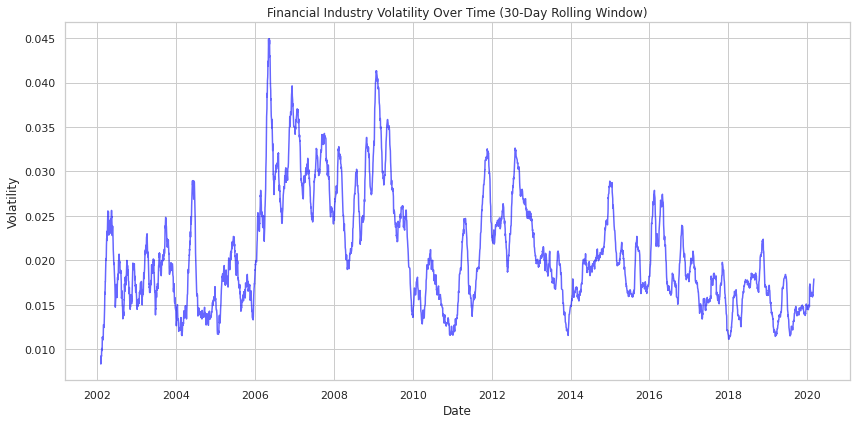

,Statistic,Value
0,Average Volatility,0.020609
1,Maximum Volatility,0.076149
2,Minimum Volatility,0.000000
3,Standard Deviation of Volatility,0.009628


In [23]:
# 2. Sector Level Volatility: Financial Industry

# Filtering the dataset to include only companies from the Financial industry
financial_sector_volatility_data = df_cleaned[df_cleaned['sector'] == 'Financials']

# Calculating daily returns for each stock in the Financial industry
financial_sector_volatility_data['daily_return'] = financial_sector_volatility_data.groupby('symbol')['close'].pct_change()

# Grouping by date to calculate daily sector volatility
daily_financial_sector_volatility = financial_sector_volatility_data.groupby('date')['daily_return'].std()

# Calculating rolling volatility (30-day window) for visualization
financial_sector_volatility_data['rolling_volatility'] = financial_sector_volatility_data['daily_return'].rolling(window=30).std()

# Visualization: Financial Industry Volatility Over Time
plt.figure(figsize=(12, 6))
plt.plot(daily_financial_sector_volatility.index, daily_financial_sector_volatility.rolling(window=30).mean(), color='blue', alpha=0.6)
plt.title('Financial Industry Volatility Over Time (30-Day Rolling Window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.tight_layout()

# Show the volatility plot
plt.show()

# Calculating key statistics for the Financial industry
average_volatility_financial = daily_financial_sector_volatility.mean()
max_volatility_financial = daily_financial_sector_volatility.max()
min_volatility_financial = daily_financial_sector_volatility.min()
std_dev_volatility_financial = daily_financial_sector_volatility.std()

# Creating a DataFrame to display the results in a tabular format for the Financial industry
volatility_stats_financial = pd.DataFrame({
    'Statistic': ['Average Volatility', 'Maximum Volatility', 'Minimum Volatility', 'Standard Deviation of Volatility'],
    'Value': [average_volatility_financial, max_volatility_financial, min_volatility_financial, std_dev_volatility_financial]
})

# Display the volatility statistics for the Financial industry
volatility_stats_financial

# Liquidity Analysis

In the Liquidity Analysis section, we delve into evaluating how swiftly and efficiently assets can be traded in the Saudi stock market, without causing significant price fluctuations. Liquidity is a vital aspect of any financial market, as it impacts the ease with which investors can enter or exit positions, and directly influences the cost of trading. Our analysis encompasses a comprehensive examination of trading volumes and values, aiming to identify the most liquid stocks and sectors. By doing so, we provide valuable insights into the parts of the market that offer the greatest flexibility and least resistance to trading activities. This analysis is crucial for traders and investors seeking to optimize their trading strategies, minimize transaction costs, and enhance their overall market participation experience. Through our investigation, we contribute to a better understanding of the market’s liquidity profile, highlighting areas of strength and pinpointing potential bottlenecks, thereby fostering a more efficient and responsive trading environment.





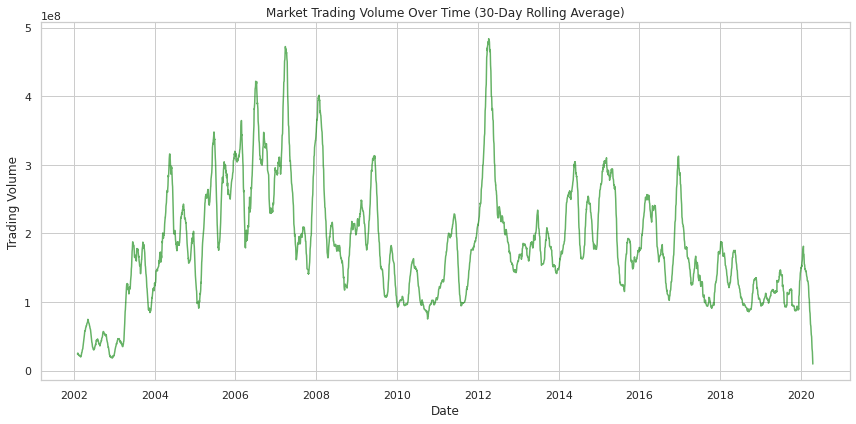

,Statistic,Value
0,Average Trading Volume,1.815742e+08
1,Maximum Trading Volume,6.771353e+08
2,Minimum Trading Volume,1.616432e+06
3,Standard Deviation of Trading Volume,1.021953e+08


In [24]:
# 1. Market Level Trading Volume and Liquidity

# Grouping by date to calculate total daily trading volume across the market
daily_market_trading_volume = df_cleaned.groupby('date')['volume_traded'].sum()

# Calculating rolling trading volume (30-day window) for visualization
rolling_trading_volume = daily_market_trading_volume.rolling(window=30).mean()

# Visualization: Market Trading Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(daily_market_trading_volume.index, rolling_trading_volume, color='green', alpha=0.6)
plt.title('Market Trading Volume Over Time (30-Day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.tight_layout()

# Show the trading volume plot
plt.show()

# Calculating key statistics for trading volume
average_trading_volume = daily_market_trading_volume.mean()
max_trading_volume = daily_market_trading_volume.max()
min_trading_volume = daily_market_trading_volume.min()
std_dev_trading_volume = daily_market_trading_volume.std()

# Creating a DataFrame to display the results in a tabular format for trading volume
trading_volume_stats = pd.DataFrame({
    'Statistic': ['Average Trading Volume', 'Maximum Trading Volume', 'Minimum Trading Volume', 'Standard Deviation of Trading Volume'],
    'Value': [average_trading_volume, max_trading_volume, min_trading_volume, std_dev_trading_volume]
})

# Display the trading volume statistics
trading_volume_stats

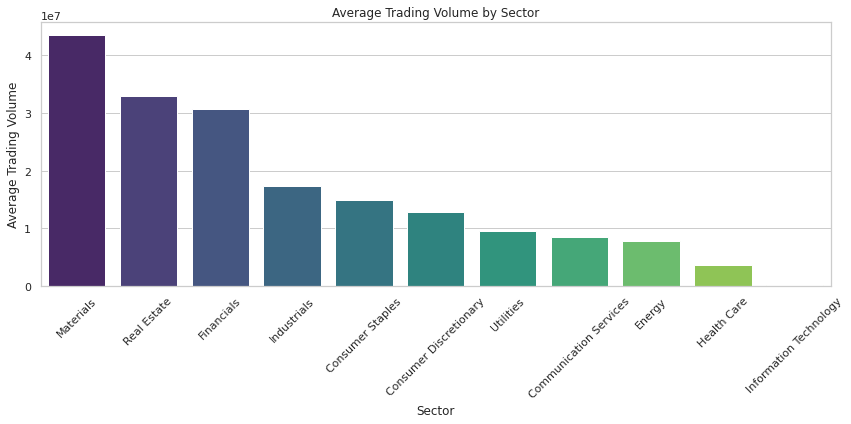

,sector,volume_traded
0,Materials,4.353299e+07
1,Real Estate,3.291720e+07
2,Financials,3.073624e+07
3,Industrials,1.735613e+07
4,Consumer Staples,1.496415e+07
5,Consumer Discretionary,1.289984e+07
6,Utilities,9.491608e+06
7,Communication Services,8.554350e+06
8,Energy,7.823247e+06
9,Health Care,3.657749e+06


In [25]:
# 2. Sector Level Trading Volume and Liquidity

# Grouping by date and sector to calculate total daily trading volume for each sector
daily_sector_trading_volume = df_cleaned.groupby(['date', 'sector'])['volume_traded'].sum().reset_index()

# Calculating average trading volume for each sector
average_sector_trading_volume = daily_sector_trading_volume.groupby('sector')['volume_traded'].mean()

# Sorting the sectors based on average trading volume
sorted_sectors_by_volume = average_sector_trading_volume.sort_values(ascending=False)

# Visualization: Average Trading Volume by Sector
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_sectors_by_volume.index, y=sorted_sectors_by_volume.values, palette='viridis')
ax.set_title('Average Trading Volume by Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Average Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

# Displaying the sorted sectors with average trading volumes
sorted_sectors_by_volume.reset_index()

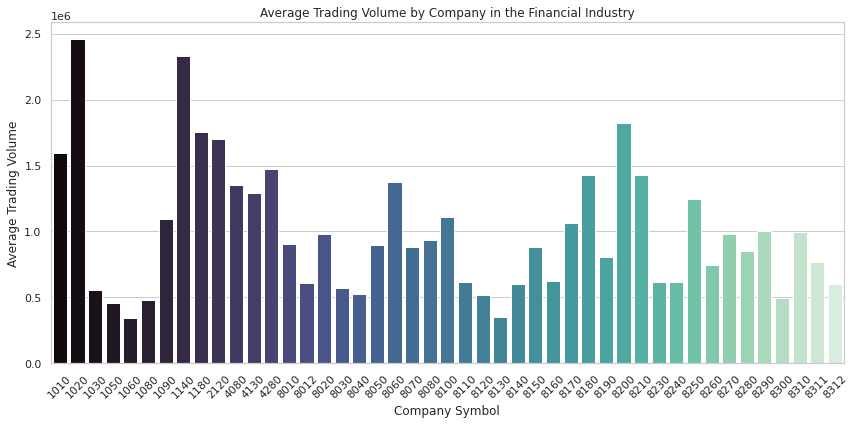

,symbol,volume_traded
0,1020,2.461801e+06
1,1140,2.329942e+06
2,8200,1.818622e+06
3,1180,1.757110e+06
4,2120,1.699556e+06
5,1010,1.593684e+06
6,4280,1.474008e+06
7,8210,1.431701e+06
8,8180,1.424797e+06
9,8060,1.371923e+06


In [26]:
# 3. Company Level Trading Volume and Liquidity in the Financial Industry

# Filtering the dataset to include only companies from the Financial industry
financial_sector_data = df_cleaned[df_cleaned['sector'] == 'Financials']

# Grouping by date and company to calculate total daily trading volume for each company in the Financial industry
daily_company_trading_volume = financial_sector_data.groupby(['date', 'symbol'])['volume_traded'].sum().reset_index()

# Calculating average trading volume for each company in the Financial industry
average_company_trading_volume = daily_company_trading_volume.groupby('symbol')['volume_traded'].mean()

# Sorting the companies based on average trading volume
sorted_companies_by_volume = average_company_trading_volume.sort_values(ascending=False)

# Visualization: Average Trading Volume by Company in the Financial Industry
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_companies_by_volume.index, y=sorted_companies_by_volume.values, palette='mako')
ax.set_title('Average Trading Volume by Company in the Financial Industry')
ax.set_xlabel('Company Symbol')
ax.set_ylabel('Average Trading Volume')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

# Displaying the sorted companies with average trading volumes
sorted_companies_by_volume.reset_index()

# Correlational Analysis

In the Correlation Analysis section, we aim to uncover the relationships and interdependencies between different stocks within the Saudi stock market, focusing particularly on their returns. By calculating correlation coefficients, we quantify the degree to which stock returns move in relation to one another, providing insights into potential co-movements and diversification opportunities. This analysis is crucial for investors looking to construct well-balanced portfolios, as understanding correlations helps in spreading risk and enhancing return potential. We pay special attention to the financial sector, creating a correlation matrix to visualize the relationships between companies within this pivotal part of the market. Through this detailed exploration, we shed light on the market’s internal dynamics, highlight potential areas for strategic investment, and contribute to a more nuanced understanding of the Saudi stock market’s behavior.

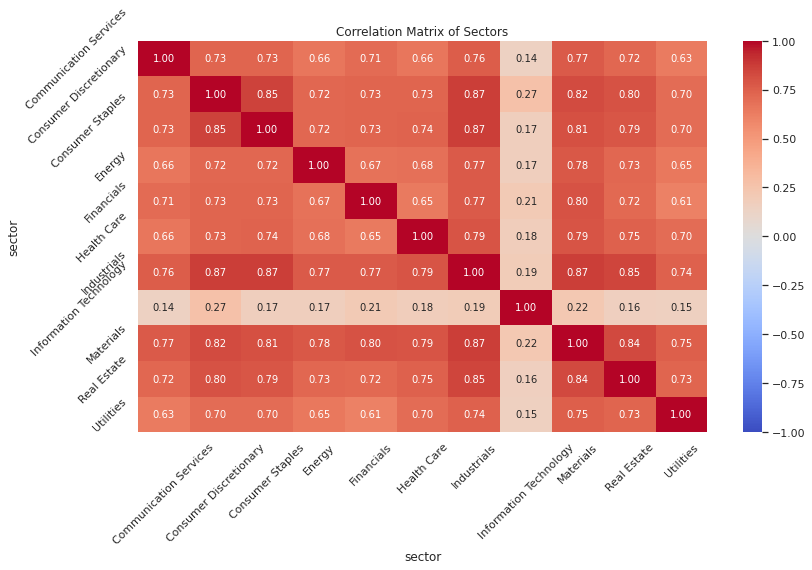

sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
sector,,,,,,,,,,,
Communication Services,1.000000,0.732958,0.727433,0.657119,0.705263,0.656577,0.761787,0.142715,0.772142,0.718862,0.634632
Consumer Discretionary,0.732958,1.000000,0.852972,0.720216,0.733977,0.732595,0.872234,0.270034,0.821131,0.803972,0.701664
Consumer Staples,0.727433,0.852972,1.000000,0.718795,0.727474,0.738600,0.874490,0.171773,0.808006,0.787330,0.701325
Energy,0.657119,0.720216,0.718795,1.000000,0.673228,0.682071,0.769195,0.165308,0.778741,0.725051,0.648865
Financials,0.705263,0.733977,0.727474,0.673228,1.000000,0.646208,0.767669,0.205711,0.802741,0.718391,0.610504
Health Care,0.656577,0.732595,0.738600,0.682071,0.646208,1.000000,0.789196,0.178311,0.789811,0.747192,0.699114
Industrials,0.761787,0.872234,0.874490,0.769195,0.767669,0.789196,1.000000,0.190733,0.871921,0.845867,0.742665
Information Technology,0.142715,0.270034,0.171773,0.165308,0.205711,0.178311,0.190733,1.000000,0.218782,0.164017,0.152257
Materials,0.772142,0.821131,0.808006,0.778741,0.802741,0.789811,0.871921,0.218782,1.000000,0.835062,0.751660


In [27]:
# 1. Market Level Correlation

# Calculating daily returns for each stock in the dataset
df_cleaned['daily_return'] = df_cleaned.groupby('symbol')['close'].pct_change()

# Pivoting the dataset to get daily returns for each sector
sector_daily_returns = df_cleaned.pivot_table(values='daily_return', index='date', columns='sector')

# Calculating the correlation matrix for sectors
sector_correlation = sector_daily_returns.corr()

# Visualization: Heatmap of Sector Correlation
plt.figure(figsize=(12, 8))
ax = sns.heatmap(sector_correlation, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Correlation Matrix of Sectors')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

# Displaying the correlation matrix for sectors
sector_correlation

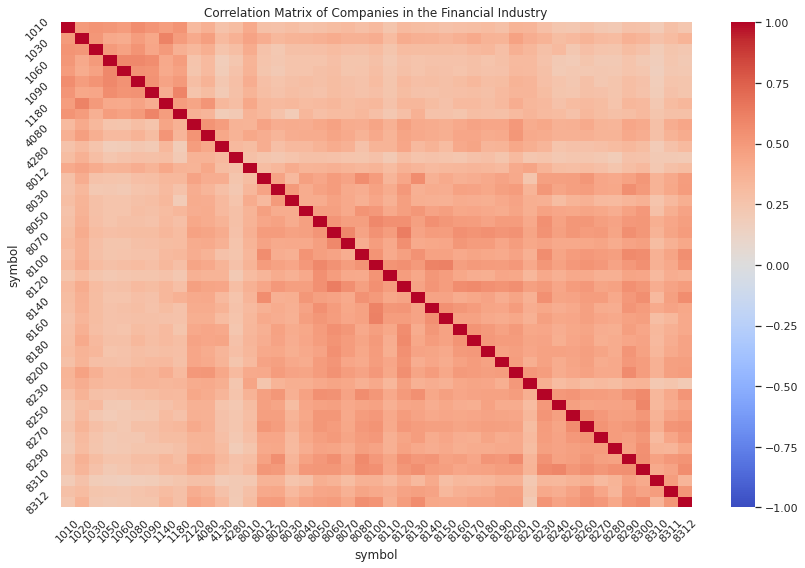

symbol,1010,1020,1030,1050,1060,1080,1090,1140,1180,2120,...,8240,8250,8260,8270,8280,8290,8300,8310,8311,8312
symbol,,,,,,,,,,,,,,,,,,,,,
1010,1.000000,0.497378,0.530503,0.511600,0.488369,0.561078,0.515766,0.482108,0.530741,0.318255,...,0.237622,0.226656,0.263237,0.230016,0.216132,0.273437,0.263792,0.196161,0.278890,0.241901
1020,0.497378,1.000000,0.510276,0.414773,0.405052,0.479405,0.422324,0.606284,0.487473,0.409891,...,0.304663,0.326758,0.351595,0.314420,0.306960,0.369007,0.349943,0.269202,0.311707,0.358167
1030,0.530503,0.510276,1.000000,0.498936,0.459030,0.523645,0.434540,0.495933,0.380541,0.333095,...,0.319673,0.226659,0.284909,0.250998,0.244236,0.299815,0.269102,0.190453,0.247676,0.226590
1050,0.511600,0.414773,0.498936,1.000000,0.581688,0.579776,0.557126,0.415611,0.480238,0.254157,...,0.216021,0.201109,0.245593,0.211470,0.213894,0.257660,0.217984,0.173872,0.238434,0.212891
1060,0.488369,0.405052,0.459030,0.581688,1.000000,0.532179,0.529072,0.407295,0.458209,0.245725,...,0.207158,0.225172,0.223323,0.231925,0.221504,0.255248,0.237558,0.171319,0.231311,0.222128


In [28]:
# Calculating daily returns for each company within the Financial industry
financial_daily_returns = financial_sector_data.pivot_table(values='daily_return', index='date', columns='symbol')

# Dropping any columns with all NaN values (if any company doesn't have return data)
financial_daily_returns = financial_daily_returns.dropna(axis=1, how='all')

# Calculating the correlation matrix for companies in the Financial industry
financial_correlation = financial_daily_returns.corr()

# Visualization: Heatmap of Financial Industry Company Correlation
plt.figure(figsize=(12, 8))
ax = sns.heatmap(financial_correlation, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Correlation Matrix of Companies in the Financial Industry')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()

# Displaying the correlation matrix for companies in the Financial industry
financial_correlation.head()  # Displaying the first few rows for a concise view

# Trading Volume Distribution Analysis

In the Trade Volume Distribution Analysis section, we delve into understanding how trading activity is distributed across different companies within the Saudi stock market. By examining trade volume data, we aim to identify which companies dominate the market in terms of trading activity, and how this activity is spread across various sectors. We employ a visual approach, utilizing a donut chart to depict market share based on trading volume, providing a clear and immediate understanding of the market's distribution. This analysis is vital for investors and market analysts alike, as it highlights key players in the market, showcases the concentration or dispersion of trading activity, and aids in identifying sectors that are more actively traded. Through this exploration, we gain valuable insights into the market's structure, understand where the majority of trading interest is concentrated, and identify potential areas for investment and further investigation.





In [29]:
# 1. Market-Wide Analysis: Calculating the total trading volume for each company in the entire market
market_wide_trading_volume = df_cleaned.groupby('symbol')['volume_traded'].sum().sort_values(ascending=False)

# Displaying the top 10 companies with the highest trading volumes in the entire market
market_wide_trading_volume.head(10)

symbol
4300 6.400265e+10
5110 4.141139e+10
2350 3.757486e+10
2010 2.591003e+10
4150 2.528580e+10
4220 2.390760e+10
2060 1.955923e+10
4040 1.830847e+10
4030 1.782754e+10
7030 1.702485e+10
Name: volume_traded, dtype: float64

<ipython-input-105-4e055d9a4f2c>:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-105-4e055d9a4f2c>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



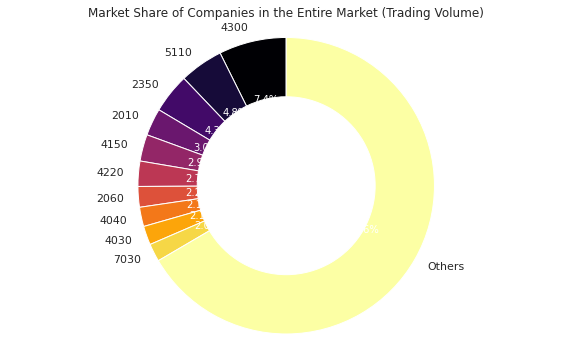

In [105]:
# Preparing data for the donut chart
top_market_companies = market_wide_trading_volume.head(10)
other_market_companies_sum = market_wide_trading_volume[10:].sum()
data_for_market_chart = top_market_companies.append(pd.Series(other_market_companies_sum, index=['Others']))

# Create a custom colormap (e.g., "inferno")
custom_cmap = cm.get_cmap('inferno')

# Plotting the donut chart for market-wide trading activity with the custom colormap
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    data_for_market_chart,
    labels=data_for_market_chart.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=custom_cmap(np.linspace(0, 1, len(data_for_market_chart)))
)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title and showing the plot
plt.title('Market Share of Companies in the Entire Market (Trading Volume)')

# Customizing colors for better visibility
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

In [31]:
# Filter the dataset for the Financial sector
financial_sector_data = df_cleaned[df_cleaned['sector'] == 'Financials']

# Calculate the total trading volume for each company in the Financial sector
financial_sector_trading_volume = financial_sector_data.groupby('symbol')['volume_traded'].sum().sort_values(ascending=False)

# Display the top 10 companies with the highest trading volumes in the Financial sector
financial_sector_trading_volume.head(10)

symbol
1020 1.163447e+10
1140 8.760583e+09
2120 7.738077e+09
1010 7.584341e+09
4080 6.350019e+09
8200 5.344930e+09
1090 5.204112e+09
4130 4.652723e+09
4280 4.634281e+09
8060 4.321558e+09
Name: volume_traded, dtype: float64

<ipython-input-106-85353176df57>:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-106-85353176df57>:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



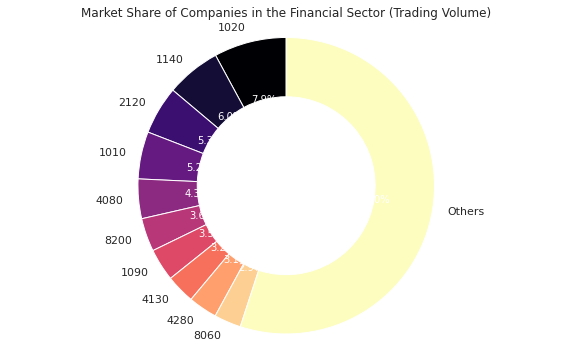

In [106]:
# Preparing data for the donut chart
top_companies = financial_sector_trading_volume.head(10)
other_companies_sum = financial_sector_trading_volume[10:].sum()
data_for_chart = top_companies.append(pd.Series(other_companies_sum, index=['Others']))

# Create a custom colormap (e.g., "magma")
custom_cmap = cm.get_cmap('magma')

# Plotting the donut chart with the custom colormap
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    data_for_chart,
    labels=data_for_chart.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=custom_cmap(np.linspace(0, 1, len(data_for_chart)))
)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title and showing the plot
plt.title('Market Share of Companies in the Financial Sector (Trading Volume)')

# Customizing colors for better visibility
for autotext in autotexts:
    autotext.set_color('white')

plt.show()

# Predictive Modelling: GARCH 

In the Predictive Modelling: GARCH section, we delve into the intricacies of forecasting future market volatility using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model. This advanced statistical model is specifically designed to understand and predict the volatility in financial time series data, making it an invaluable tool for risk management and investment strategy.

We start by fitting a GARCH(1,1) model to the return series of a specific stock or the market, capturing the time-varying volatility and providing us with the ability to forecast future volatility levels. The model considers the magnitude of previous returns as well as past volatility, allowing for a nuanced understanding of market conditions.

By employing this model, we aim to quantify and predict the level of risk associated with investing in the Saudi stock market, offering investors a clearer picture of potential price fluctuations and aiding in the optimization of their investment portfolios. This section not only highlights the practical applications of advanced financial modeling but also underscores the importance of understanding market volatility in making informed investment decisions. Through the GARCH model, we transform raw financial data into actionable insights, paving the way for a more robust and resilient investment strategy in the face of market uncertainties.





In [33]:
# Filter the dataset for stock 1020 in the Financials sector, ensuring compatible data types
stock_1020_data = df_cleaned[(df_cleaned['symbol'] == 1020) & (df_cleaned['sector'] == 'Financials')]

# Sort the data in chronological order
stock_1020_data = stock_1020_data.sort_values(by='date')

# Check for missing values in the 'close' column
missing_values = stock_1020_data['close'].isnull().sum()

# Display the first few rows of the data and the number of missing values
stock_1020_data.head(), missing_values

(        symbol           name trading_name      sector       date  open  high  \
 380023    1020  Bank Aljazira         BJAZ  Financials 2001-12-31  2.38  2.38   
 380022    1020  Bank Aljazira         BJAZ  Financials 2002-01-01  2.38  2.52   
 380021    1020  Bank Aljazira         BJAZ  Financials 2002-01-02  2.52  2.52   
 380020    1020  Bank Aljazira         BJAZ  Financials 2002-01-03  2.52  2.52   
 380019    1020  Bank Aljazira         BJAZ  Financials 2002-01-05  2.52  2.52   
 
          low  close  change  perc_Change  volume_traded  value_traded  \
 380023  2.38   2.38 -101.37       -97.71        39118.0      92981.25   
 380022  2.38   2.51    0.13         5.46       255945.0     614015.00   
 380021  2.52   2.51    0.00         0.00      2228573.0    5478124.75   
 380020  2.52   2.51    0.00         0.00       738926.0    1825350.00   
 380019  2.52   2.51    0.00         0.00       718949.0    1761923.50   
 
         no_trades  daily_return  rolling_volatility  
 3800

In [34]:
# Ensure the data for stock 1020 is sorted by date
stock_1020_data_sorted = stock_1020_data.sort_values(by='date')

# Calculate the Interquartile Range (IQR) for the 'close' prices
Q1 = np.percentile(stock_1020_data_sorted['close'], 25)
Q3 = np.percentile(stock_1020_data_sorted['close'], 75)
IQR = Q3 - Q1

# Identify potential outliers
outliers = stock_1020_data_sorted[(stock_1020_data_sorted['close'] < (Q1 - 1.5 * IQR)) | 
                                   (stock_1020_data_sorted['close'] > (Q3 + 1.5 * IQR))]

# Display potential outliers with date and 'close' price
outliers[['date', 'close']]

,date,close
378876,2005-11-12,35.94
378875,2005-11-13,35.69
378874,2005-11-14,35.55
378867,2005-11-22,35.55
378866,2005-11-23,36.48
...,...,...
378606,2006-11-05,42.82
378605,2006-11-06,40.84
378604,2006-11-07,39.65
378603,2006-11-08,35.69


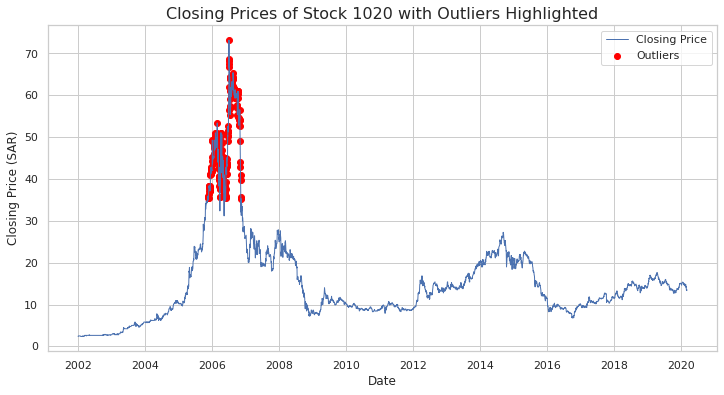

In [35]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the closing prices and highlight the outliers
plt.figure(figsize=(12, 6))
plt.plot(stock_1020_data_sorted['date'], stock_1020_data_sorted['close'], label='Closing Price', linewidth=1)
plt.scatter(outliers['date'], outliers['close'], color='red', label='Outliers')

# Add title and labels
plt.title('Closing Prices of Stock 1020 with Outliers Highlighted', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (SAR)', fontsize=12)
plt.legend()

# Show the plot
plt.show()

In [36]:
# Conducting the Augmented Dickey-Fuller test for stationarity
adf_test_result = adfuller(stock_1020_data_sorted['close'])

# Displaying the results
adf_test_result

(-2.463410370873671,
 0.12463264018673781,
 30,
 4695,
 {'1%': -3.43174358442948, '5%': -2.862155804819358, '10%': -2.56709779516423},
 7790.314088088342)

In [37]:
# Apply a first-order differencing transformation to make the time series stationary
stock_1020_diff = stock_1020_data_sorted['close'].diff().dropna()

# Perform the Augmented Dickey-Fuller test again on the differenced data
adf_test_result_diff = adfuller(stock_1020_diff)

# Display the results of the stationarity test on the differenced data
adf_test_result_diff

(-11.451163305308741,
 5.853561784976458e-21,
 32,
 4692,
 {'1%': -3.4317444759563105,
  '5%': -2.862156198679841,
  '10%': -2.5670980048334617},
 7785.227536920578)

In [38]:
# Calculate daily returns from the closing prices
stock_1020_data_sorted['returns'] = stock_1020_data_sorted['close'].pct_change().dropna()

# Display the first few rows of the data with returns
stock_1020_data_sorted[['date', 'close', 'returns']].head()

,date,close,returns
380023,2001-12-31,2.38,NaN
380022,2002-01-01,2.51,0.054622
380021,2002-01-02,2.51,0.000000
380020,2002-01-03,2.51,0.000000
380019,2002-01-05,2.51,0.000000


In [40]:
# Ensure the data is sorted by date and NaN values in 'returns' are dropped
stock_1020_data_sorted = stock_1020_data_sorted.sort_values(by='date').dropna(subset=['returns'])

# Fit a GARCH(1, 1) model to the returns data
garch_model = arch_model(stock_1020_data_sorted['returns'], vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Display the summary of the GARCH model results
print(garch_results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.180761655164564e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3.406173640859369e+19
Iteration:      3,   Func. Count:     30,   Neg. LLF: 38361534066138.82
Iteration:      4,   Func. Count:     44,   Neg. LLF: -11982.174157915262
Optimization terminated successfully    (Exit mode 0)
            Current function value: -11982.174144932691
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                11982.2
Distribution:                  Normal   AIC:                          -23956.3
Method:            Maximum Likelihood   BIC:                          -23930.5
                   

/opt/python/envs/default/lib/python3.8/site-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005003. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




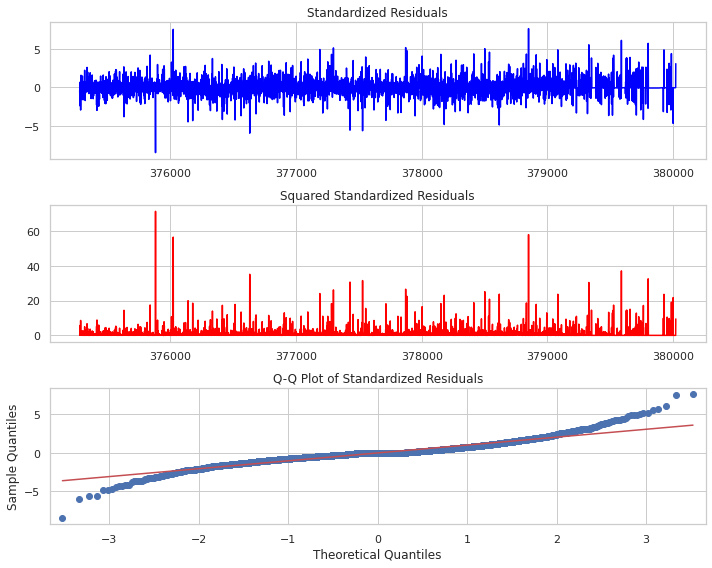

In [41]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Calculate standardized residuals
std_resid = garch_results.resid / garch_results.conditional_volatility

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# Plot standardized residuals
ax[0].plot(std_resid, color='blue')
ax[0].set_title('Standardized Residuals')

# Plot squared standardized residuals
ax[1].plot(std_resid**2, color='red')
ax[1].set_title('Squared Standardized Residuals')

# Q-Q plot for standardized residuals
qqplot(std_resid, line='s', ax=ax[2])
ax[2].set_title('Q-Q Plot of Standardized Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
# Print first 5 rows of standardized residuals
print("Standardized Residuals:")
print(std_resid.head())

# Print first 5 rows of squared standardized residuals
print("\nSquared Standardized Residuals:")
print((std_resid ** 2).head())

# Print first 5 rows of Q-Q plot data
qq_plot_data = stats.probplot(std_resid, dist='norm')
print("\nQ-Q Plot Data:")
print("Theoretical Quantiles:\n", qq_plot_data[0][0][:5])
print("Ordered Values:\n", qq_plot_data[0][1][:5])

Standardized Residuals:
380022    3.077274
380021   -0.031058
380020   -0.032781
380019   -0.034560
380018   -0.036392
dtype: float64

Squared Standardized Residuals:
380022    9.469615
380021    0.000965
380020    0.001075
380019    0.001194
380018    0.001324
dtype: float64

Q-Q Plot Data:
Theoretical Quantiles:
 [-3.62108146 -3.38487209 -3.25463995 -3.16354365 -3.09293768]
Ordered Values:
 [-8.45737083 -5.93497444 -5.6218349  -5.54345654 -4.87465331]


In [103]:
# Generating a 7-day ahead forecast
forecast = garch_results.forecast(start=0, horizon=7)

# Extracting the forecasted volatility
forecasted_volatility = forecast.variance.iloc[-1].apply(np.sqrt) * np.sqrt(252)

# Printing the forecasted volatility
print("7-Day Ahead Volatility Forecast:")
print(forecasted_volatility)

7-Day Ahead Volatility Forecast:
h.1    0.280923
h.2    0.282597
h.3    0.284228
h.4    0.285817
h.5    0.287366
h.6    0.288876
h.7    0.290349
Name: 375277, dtype: float64


/opt/python/envs/default/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




/opt/python/envs/default/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




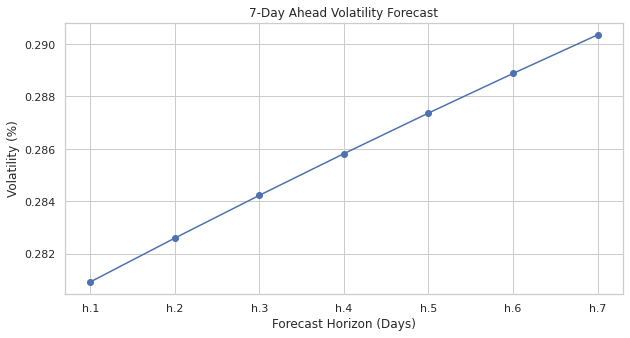

In [104]:
# Generating a 7-day ahead forecast
forecast = garch_results.forecast(start=0, horizon=7)

# Extracting the forecasted volatility
forecasted_volatility = forecast.variance.iloc[-1].apply(np.sqrt) * np.sqrt(252)

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(forecasted_volatility.index, forecasted_volatility, marker='o', linestyle='-')
plt.title('7-Day Ahead Volatility Forecast')
plt.xlabel('Forecast Horizon (Days)')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.show()

# Monte Carlo Simulation

In the Monte Carlo Simulation section, we utilize a powerful and versatile statistical technique to forecast potential future scenarios for stock prices in the Saudi stock market. The Monte Carlo Simulation relies on generating a large number of random samples to model the probability distribution of stock prices, taking into account the historical volatility and returns.

This probabilistic approach enables us to create a spectrum of possible outcomes, providing a comprehensive view of potential future market conditions. We use the geometric Brownian motion model, a cornerstone in financial mathematics, to simulate the random walk behavior of stock prices, incorporating the mean returns and volatility in our calculations.

By conducting this simulation, we aim to equip investors with a robust tool for risk assessment and portfolio planning. Investors can better understand the range of potential outcomes, assess the risk-return trade-off, and make more informed investment decisions.

This section not only showcases the application of advanced statistical modeling in finance but also emphasizes the importance of preparing for uncertainty in the investment landscape. The Monte Carlo Simulation serves as a critical component of our analysis, enhancing our capacity to navigate the complexities of the Saudi stock market and providing a solid foundation for strategic investment planning.





In [95]:
# Filter the data for stock 1020 and the last 4 years
df_1020 = df_cleaned[(df_cleaned['symbol'] == 1020) & (df_cleaned['date'] > '2016-04-16')]

# Sort the data by date
df_1020 = df_1020.sort_values(by='date')

# Calculate daily returns
df_1020['daily_returns'] = df_1020['close'].pct_change()

# Drop missing values
df_1020 = df_1020.dropna()

# Set the number of simulations and trading days
num_simulations = 1000
num_trading_days = 8

# Set the last closing price
last_price = df_1020['close'].iloc[-1]

# Initialize the simulations array
simulations = np.zeros((num_simulations, num_trading_days))

# Run the simulations
for i in range(num_simulations):
    # Create the random walk and add to simulations array
    random_walk = np.random.normal(loc=df_1020['daily_returns'].mean(), 
                                   scale=df_1020['daily_returns'].std(), 
                                   size=num_trading_days)
    price_series = last_price * (np.cumprod(1 + random_walk) - 1)
    simulations[i, :] = price_series

# Convert the simulations array to a DataFrame
simulations_df = pd.DataFrame(simulations, columns=[f'Day {i+1}' for i in range(num_trading_days)])

# Print the first few rows of the simulations DataFrame
print(simulations_df.head())

      Day 1     Day 2     Day 3     Day 4     Day 5     Day 6     Day 7  \
0  0.381465  0.449176  0.571465  0.792804  0.459814  0.786487  0.664748   
1  0.053515  0.078589  0.153313  0.455898  0.380856  0.440678  0.219526   
2 -0.102794 -0.237792 -0.194102 -0.165378 -0.514539 -0.928529 -0.621850   
3  0.201473  0.279217  0.370499  0.325971  0.125931  0.094334 -0.346508   
4  0.170443 -0.116462 -0.413110 -0.439410 -0.650011 -0.737271 -1.007016   

      Day 8  
0  0.605870  
1  0.307838  
2 -0.438510  
3 -0.198609  
4 -1.082417  


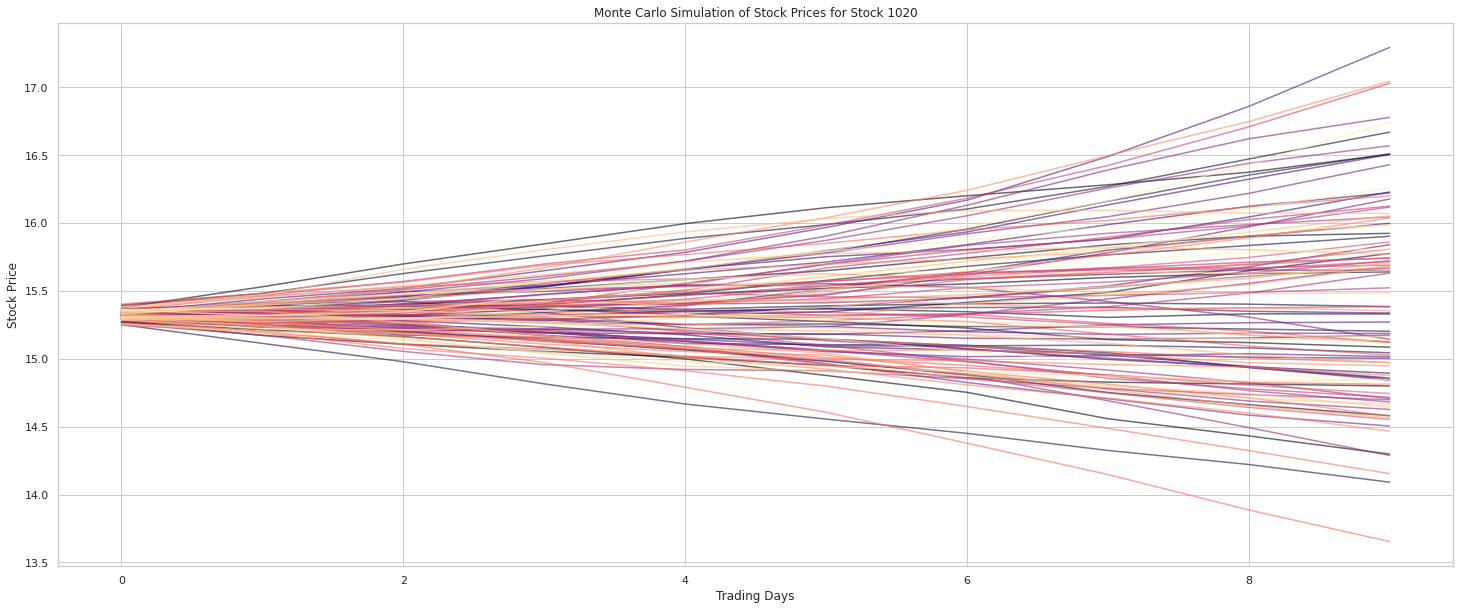

In [107]:
# Convert price_paths to a NumPy array if it's not already
if isinstance(price_paths, pd.DataFrame):
    price_paths = price_paths.values

# Number of simulations
num_simulations = 100

# Plotting
plt.figure(figsize=(25, 10))
colors = cm.magma(np.linspace(0, 1, num_simulations))
for i in range(num_simulations):
    plt.plot(price_paths[i, :], color=colors[i], alpha=0.6)
plt.title('Monte Carlo Simulation of Stock Prices for Stock 1020')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [96]:
# Calculate mean
mean = simulations_df.mean()

# Calculate median
median = simulations_df.median()

# Calculate standard deviation
std_dev = simulations_df.std()

# Calculate minimum
min_val = simulations_df.min()

# Calculate maximum
max_val = simulations_df.max()

# Create a DataFrame to display the results
descriptive_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std_dev,
    'Minimum': min_val,
    'Maximum': max_val
})

# Print the descriptive statistics
print(descriptive_stats)

           Mean    Median  Standard Deviation   Minimum   Maximum
Day 1  0.012646  0.005076            0.214888 -0.652349  0.666197
Day 2  0.019817  0.008181            0.300332 -0.858918  1.082877
Day 3  0.031109  0.011744            0.372828 -1.345703  1.364069
Day 4  0.051400  0.049759            0.444474 -1.617263  1.552742
Day 5  0.055645  0.031070            0.511694 -1.586950  2.094801
Day 6  0.072312  0.042379            0.551464 -1.650192  2.311370
Day 7  0.084378  0.045330            0.594878 -1.527262  2.288278
Day 8  0.096653  0.049381            0.643201 -1.655536  2.439113


In [97]:
worst_case = simulations_df.min()
print("Worst Case Scenario:")
print(worst_case)

Worst Case Scenario:
Day 1   -0.652349
Day 2   -0.858918
Day 3   -1.345703
Day 4   -1.617263
Day 5   -1.586950
Day 6   -1.650192
Day 7   -1.527262
Day 8   -1.655536
dtype: float64


In [98]:
median_case = simulations_df.median()
print("\nMedian Case Scenario:")
print(median_case)


Median Case Scenario:
Day 1    0.005076
Day 2    0.008181
Day 3    0.011744
Day 4    0.049759
Day 5    0.031070
Day 6    0.042379
Day 7    0.045330
Day 8    0.049381
dtype: float64


In [100]:
best_case = simulations_df.max()
print("\nBest Case Scenario:")
print(best_case)


Best Case Scenario:
Day 1    0.666197
Day 2    1.082877
Day 3    1.364069
Day 4    1.552742
Day 5    2.094801
Day 6    2.311370
Day 7    2.288278
Day 8    2.439113
dtype: float64


# Conclusion

In concluding our comprehensive analysis of the Tadawul Saudi Stock Market, we have unearthed a spectrum of insights, discerned patterns, and understood the market’s responses to various stimuli. Our journey through the data, from exploratory analysis to advanced predictive modeling, has equipped us with a profound comprehension of the market’s dynamics.

Beginning with rigorous data cleaning and preprocessing, we ensured a robust foundation for our explorations. The exploratory data analysis illuminated the market’s diversity, sectoral distribution, and pricing patterns, providing a macroscopic understanding of its structure.

In our volatility analysis, we quantified the market’s risk levels, while the liquidity analysis identified the most liquid sectors and stocks, vital for informed trading and investment decisions. The correlation analysis exposed the interconnectedness between different stocks and sectors, and the trade volume distribution analysis highlighted the market share of various sectors, shedding light on market competitiveness.

Our foray into predictive modeling, with the GARCH model and the Monte Carlo Simulation, offered a glimpse into the future, providing quantifiable risk measures and potential future stock price scenarios. These models are pivotal in bridging historical trends with future possibilities, enhancing our strategic decision-making capabilities.

However, it is imperative to acknowledge that this report, while comprehensive, is not an exhaustive analysis of the Saudi stock market. There are avenues for further exploration and refinement, particularly in the realm of predictive modeling. Future work could involve refining the GARCH model, exploring alternative volatility models, or employing machine learning techniques for more accurate forecasting. Additionally, delving deeper into sector-specific analyses or integrating external economic indicators could provide a more holistic view of the market’s behavior.

Our report stands as a detailed guide through the intricacies of the Saudi stock market, offering valuable insights and a strong foundation for investment decisions. Yet, the financial landscape is ever-evolving, and continuous learning and analysis are paramount. This report paves the way for future investigations, encouraging a relentless pursuit of knowledge and an unwavering commitment to understanding the market’s complexities. In doing so, we fortify our ability to navigate the financial world with confidence and precision, always ready for the challenges and opportunities that lie ahead.